># Recurrent Neural Networks (RNN)

Hello there!<br>
Congragulations for successfully completing all the previous notebook, here we are at the last topic to be covered in this course *Introduction to Deep learning*<br>

By this time, I'm guessing you would have heard about how RNN has revolutionized Natural Language Processing Domain. It is the same reason your alexa, siri despite being non-human are able to understand what you say!<br>

This fact got me super excited to learn about RNN and I believe it did the same to you as well.

RNN in a nutshell

RNN are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data. It is one of the algorithms behind the scenes of the amazing achievements seen in deep learning over the past few years.

Let's take a quick look at the sub-topics we will touch upon in this tutorial.

*   Where do we use RNN?
*   Types of RNN.
*   Applications of RNN.
*   Basic architecture.
*   TensorFlow syntax of RNN layer.
*   Minor variants of RNN(Bidrectional RNN).



##Where do we use RNN?<br>
* RNN is most used where the data is sequenced, that is an order is present in a single input. For ex :<br>
<t>1. A csv file or tabular data is not a sequenced input since the order of the columns dosen't matter.
<t>2. Let's say you want to predict the path of a missile, just knowing the current position of the missile would not be enough, you need to know the history of its positions and the respective timestamps of the positions. This is also a perfect example for sqequenced data.<br>
<t>3. A sentence is an sequenced input as you know, if we shuffle the order of words of the sentence, it will no longer hold the same meaning even if all the words are present.<br>


* Where the input and output lenght will vary from one input to other in the same dataset, therefore it is necessary to adapt a technique to make all the inputs of same length.<br>
<t> Taking the same sentence example above, each sentence will may have different length. Since a plain Neural network expects the input and output to be fixed, it's not possible to train NN with such a dataset.

These days you can find application of RNN in computer vision also, but it's not used much.

##"Types of RNN
RNN is very flexible with its sequence length which is feeded in as its input or the sequence its going to output.<br>
*Note* : Each rectangular box in the diagram represents a single basic RNN cell.
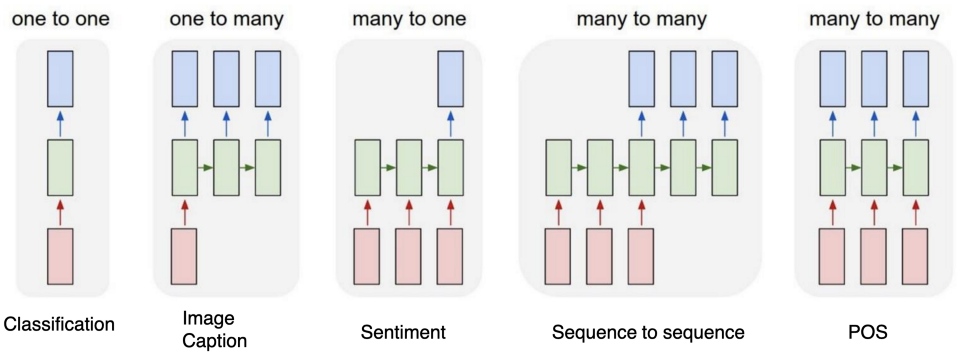
Source : Basic RNN architectures (Stanford cs231 lecture)

<br>
1. One-to-one : <br>

*   Input sequence length= 1.
*   Output sequence length = 1.
*    It's a standard NN which you used in your previus projects.
<br>
2. One-to-many : <br>
*    Input sequence length = 1.
*    Output sequence length = more than 1.
*    Example = Text/Image/Music Generation.
<br>3. Many-to-one : <br>
* Input sequence length = more than 1.
* Output sequence length = 1.
* Example = Text/Image classification
<br>
4. Many-to-Many : <br>
* Input sequence length = more than 1.
* Output sequence length = more than 1.
* Example = Machine Language translation. (In this you can either use the same RNN cell to take input and predict using the same or use different cells to take input and use different set of cells to produce output, this latter architecture is known as encoder decoder architecture(5th diagram from left))






## Why does RNN perform well on Sequenced Data?<br>

Now that you are familar with feed forward neural networks, you can notice the prediction was based only on two things :<br>


*   Current input
*   Parametrs fixed during trainig<br>

It is intutive to notice that a simple NN cannot perform well on sequenced data as it is not able to capture history or contain any sought of memory in it. RNN takes into account of it's prevoius inputs to make further predictions.

RNN and its variants on the hand are designed with such a architecture, so that it can have a memory element inside it!
<br> Now let's see how RNN does do it! 



# Applications of RNN
### RNN already has nuemerous applications in industry<br>
* Image Captioning:<br>
Given an image it will describe what is going om in the picture with a brief sentence.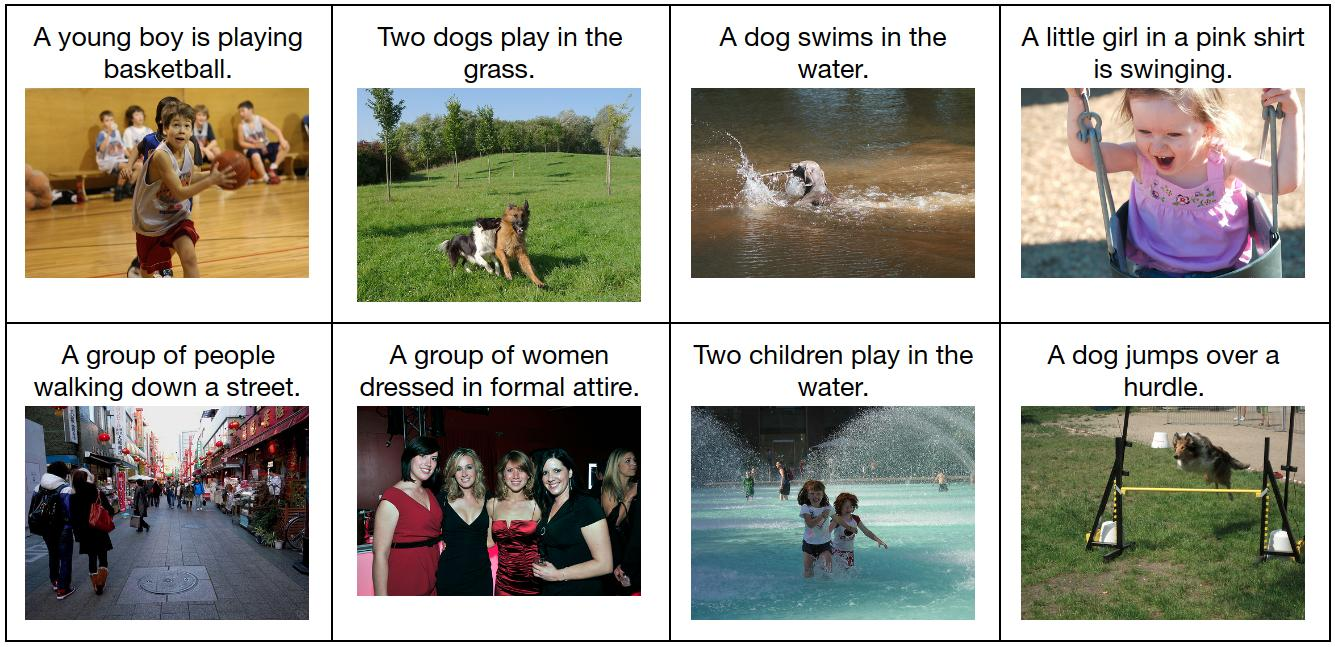<br>
* Text summarization:<br>
Given a lenghty paragraph, RNN can capture the gist of the whole paragraph and present the same information with few sentences. For example you could record your meeting audio convert it to text and have short summary of the meet ready!<br>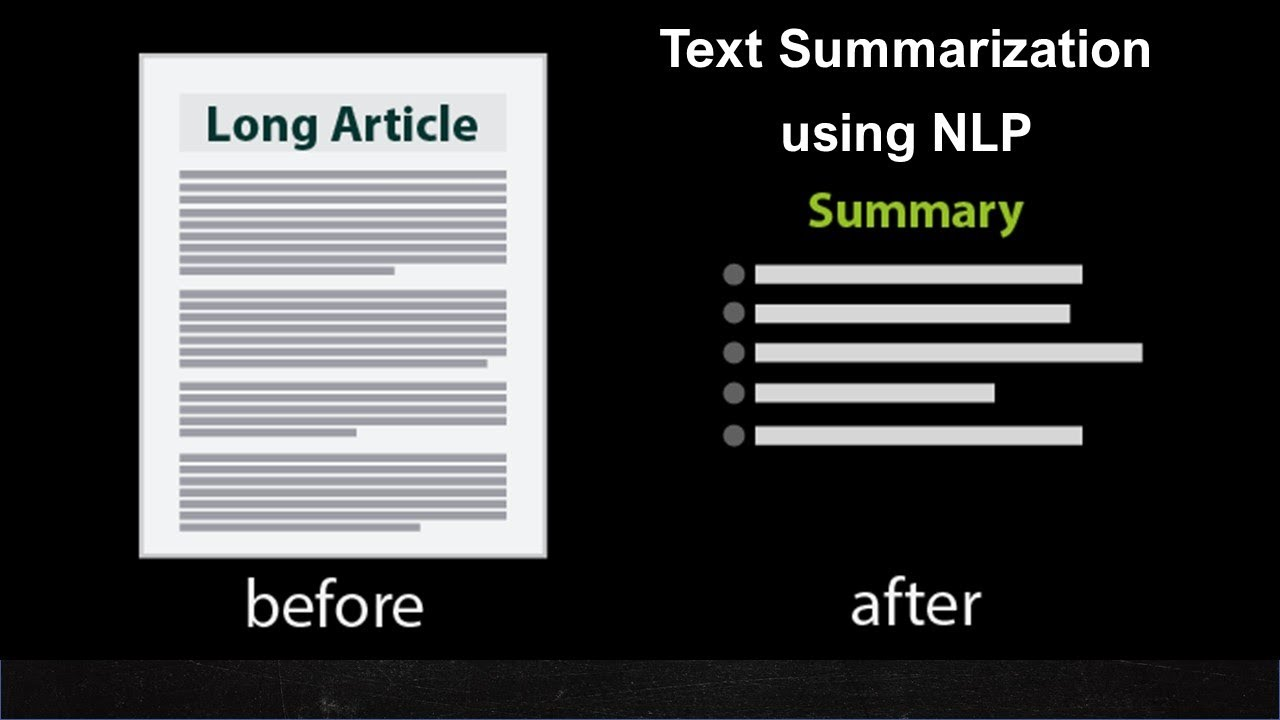<br>
source : https://www.youtube.com/watch?app=desktop&v=9PoKellNrBc
* Text Generation:<br>
You could show your model a certain writing style like Shakesphere and you can expect the model to generate text in the same style.<br>
 [You can play around and see how diveresely models can generate text!](https://deepai.org/machine-learning-model/text-generator)

#Basic RNN Structure
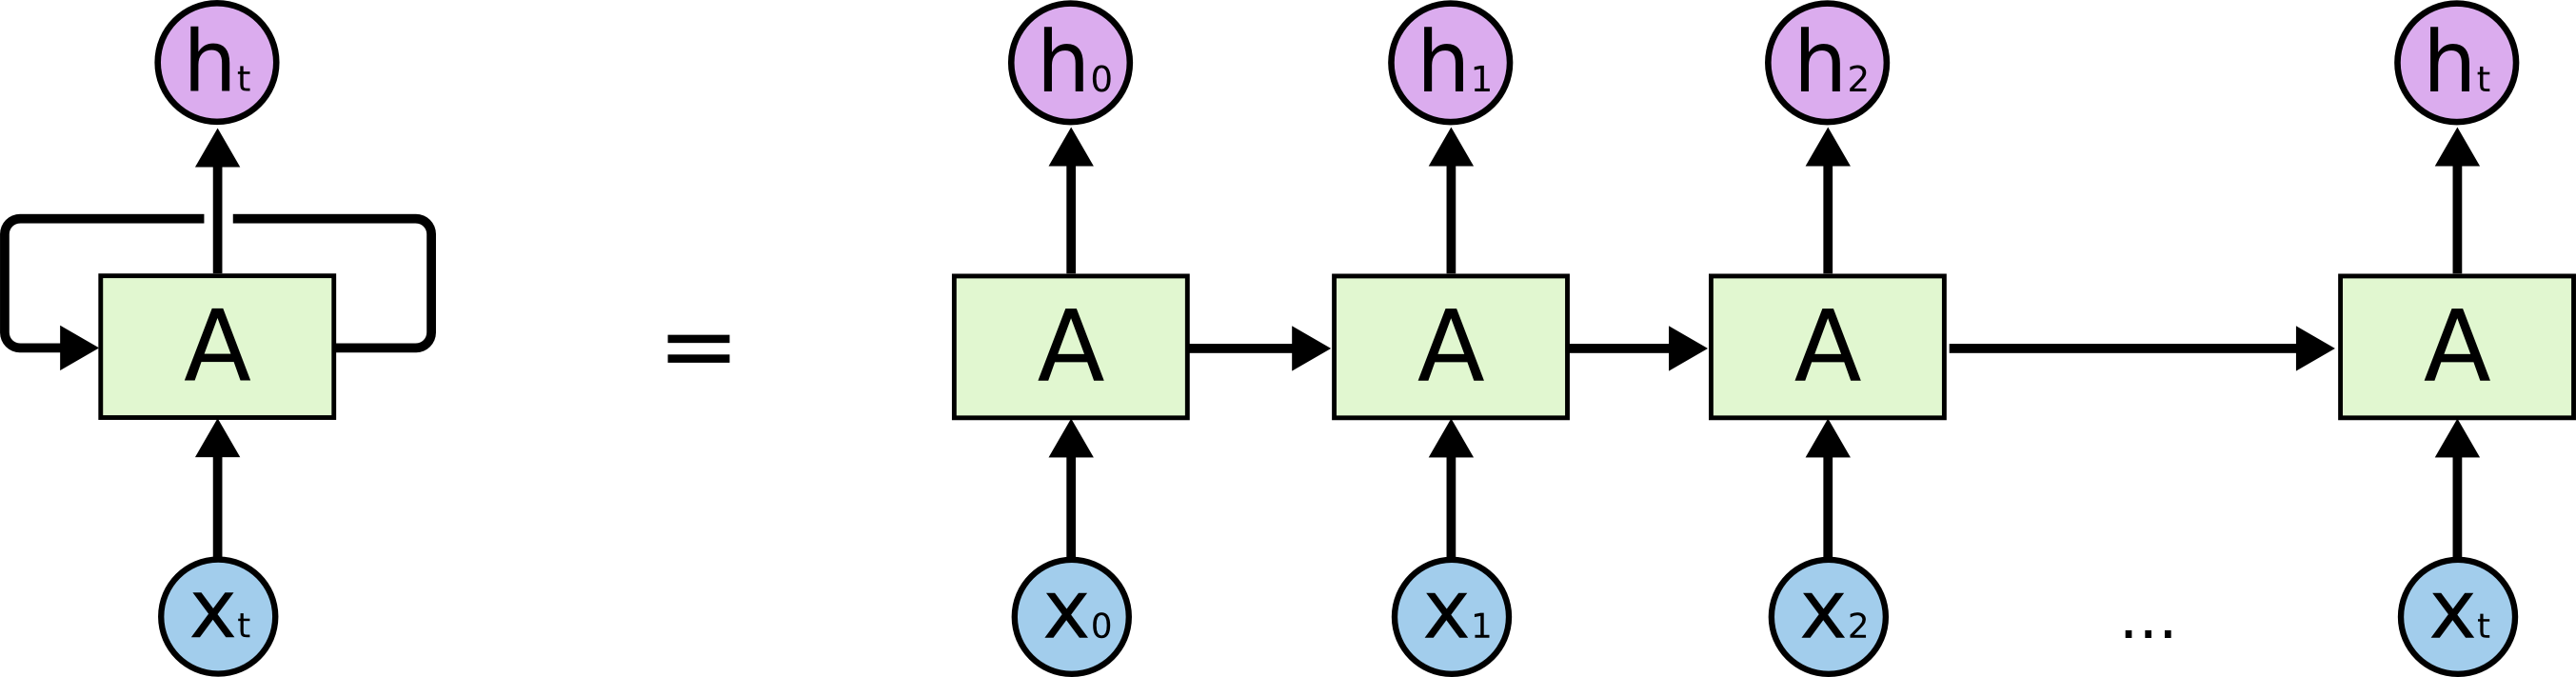<br>
If you look closely, RNN are not much different from the standard Nueral Networks. The main factor differentiating it from the standard NN is that RNNs are capable of storing history of previous step and include them while predicting the current output.<br>

The two main architecture features of RNN:
 *   A feedback loop is provided from prevoius output to current input timestamp.
 *    As shown in the picture, RNN is just repeating NN multiple times, where the same NN *A*( A standard NN) is used in each copy.This feature helps to reduce the number of parameters present in the model even if the architecture becomes huge. <br> 
 In a single copy only 2 set of weights and bias of *A* network will be trained :<ber>
* one for computing the hiddden state to pass it to the next copy/timestamp *Wh* and *bh*.
*  Other for computing the output if required *Wo* and *bo*.
<br>
Let us understand this perfectly with an example.<br>

You want to classify a sentence as positive or negative, for ex let's take " I am excited to do learn more about RNN."<br>
* The sequence length or the *t* mentioned in the image is equal to the number of words in the sentence, in our case it's Nine.
* In each step, you will pass one word to RNN i.e in first step, you will pass the first word *X0* to Nn *A* to compute the two set of parameters mentioned above.
*  For the next step(second) you will take the hidden state computed from *t-1* step and the current input *X1* to compute another set of hidden abd output states.
* Note, that you can compute the output matrix only if you require output from that copy of RNN cell.
*  The same process continues till timestep is equal to 8 (0 indexing).

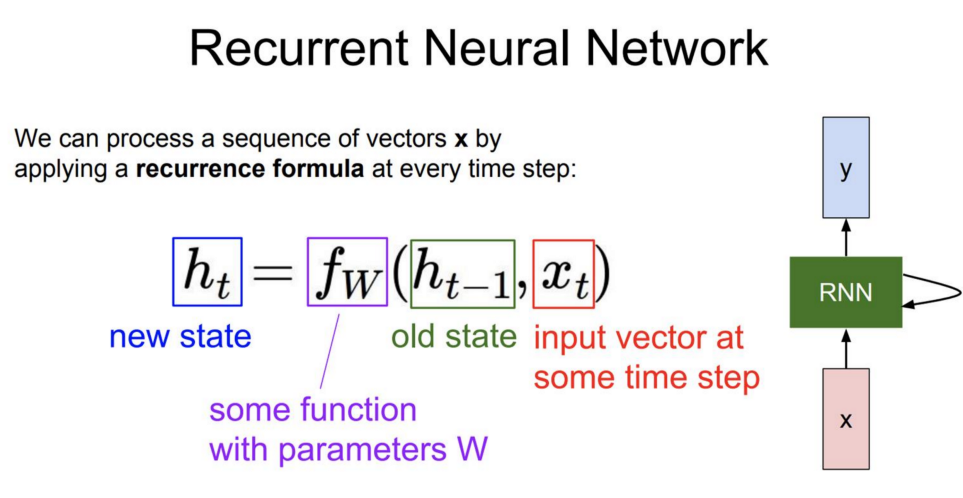
Source : Image showing basic equations of RNN(http://cs231n.stanford.edu)
<br>
Everything discussed till now can be summarized with the above equation.

# Let's Code with tensorflow!


#Other important hyperparamters in RNN

*   Number of layers
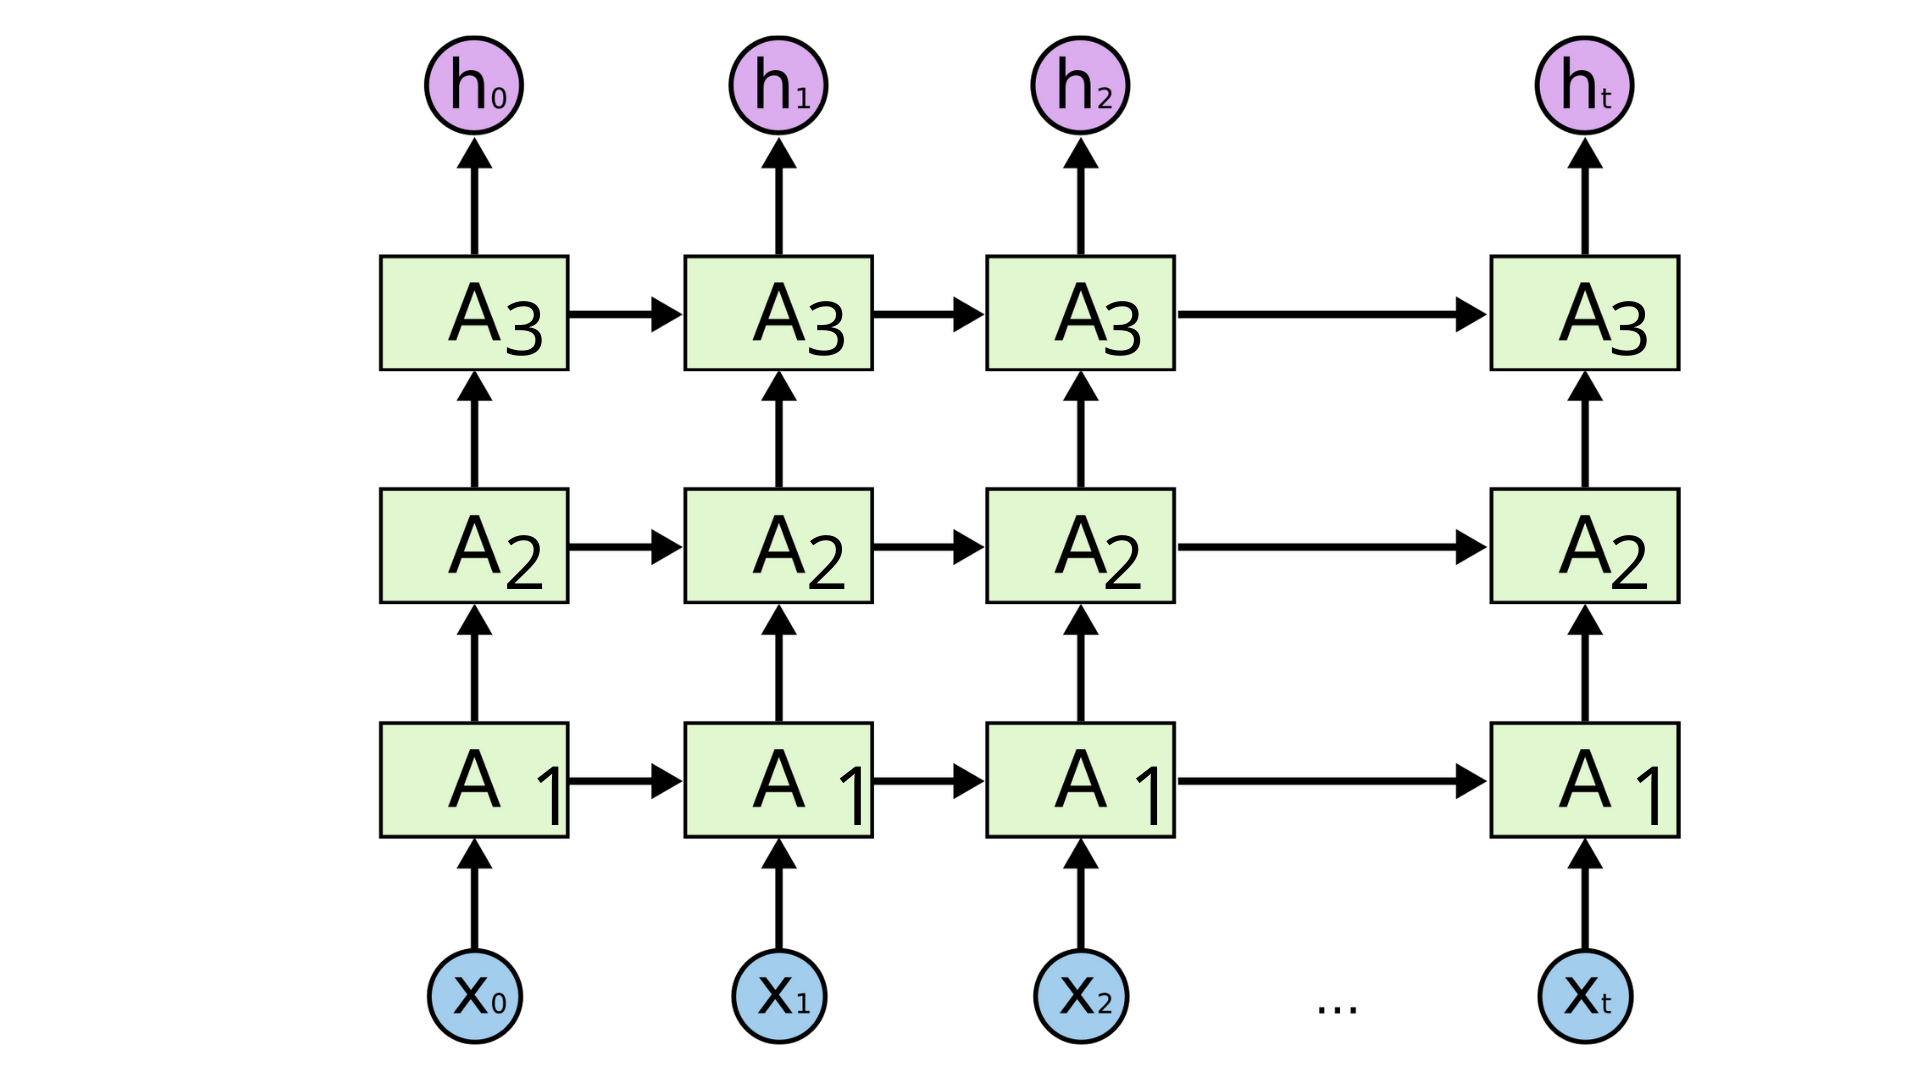<br>
 * Number of layers in RNN specifies how many Basic RNN structure do you want to stack up!
 * For example in the diagram mentioned above, we have 3 layers each having it's separate NN i.e separate corresponding parameters.
 *  The output matrix of the first layers is passed on as the input layer of the second layer and the output of the second layer is passed on as input for third layers.
 * The output of the last layer(third in our case) becomes the final output.<br>

 Use more number of layers when there is a complex relationship present in the dataset and a single yayer RNN isn't giving you good accuracy or other metrics.
 <br>
 <br>

 * Bidirectional?
 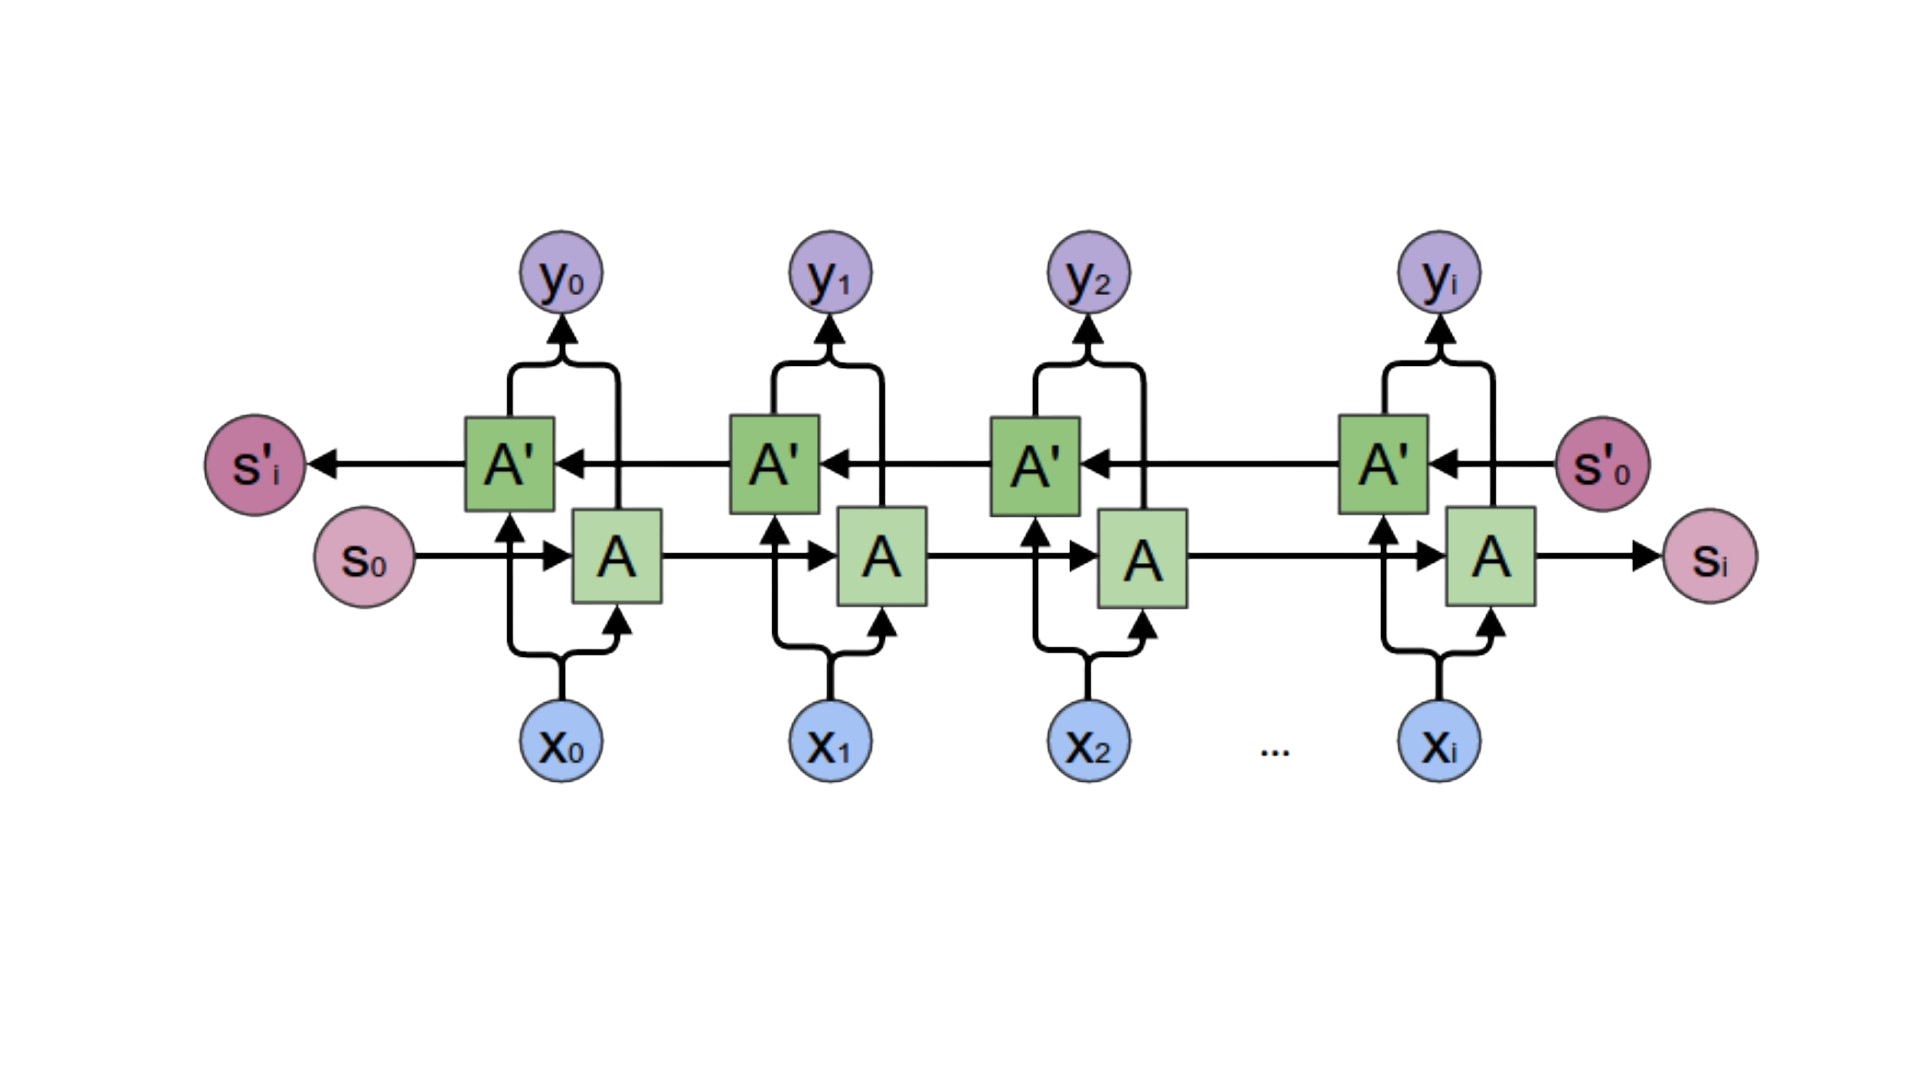

In [ ]:
import tensorflow as tf
print(tf.__version__) # Check for the current version of  tf you are using

2.4.1


### Build your simple first RNN



In [ ]:
(tf.keras.layers.RNN(cell = 55,return_sequences =True,return_state=True, time_major=False))

The above is the syntax for Basic RNN. <br>
The first parameter ***cell*** represents the recurrent state cell i.e the number of hidden states in the NN inside RNN.(Also known as state_size)<br>
The second parameter ***return_sequences*** if set True will return the output state of the last cell.<br>
The third parameter ***return_state*** if set True will return the hidden state of the current cell

Input Shape : <br>
if time_major==False : shape = [batch_size, timesteps, ...]<br>
if time_major==True  : shape = [timesteps, batch_size, ...]

Output Shape : <br>
 for *return_sequences* = [batch_size, state_size]<br>
 for *return_sequences* = <br>
 [batch_size, timesteps, output_size]<t>[time_major==False]<br>
<t> <t>[timesteps, batch_size, output_size]<t>[time_major==True]


In [ ]:
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(55,return_sequences =True)) 

To make a RNN bidirectional wrap it inside a bidirectional layer.
The input shape will remain same as you would feed to a uni-directional RNN and the output would be different as you will have output_size = output_size * 2.
i.e<br>

Output Shape : <br>
 for *return_sequences* = <br>
 [batch_size, timesteps, output_size * 2]<t>[time_major==False]<br>
<t> <t>[timesteps, batch_size, output_size * 2]<t>[time_major==True]